In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from matplotlib_venn import venn2,venn3,venn2_unweighted,venn3_unweighted
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D
import string

In [2]:
dirname = "../result/"

In [3]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'
def name_type(x):
    if x.startswith('DECOY'):
        return 'DECOY_null'
    else:
        return 'SAMPLE'

In [4]:
csodiaqfile=[
"CsoDIAq-file1_20190405_MCF7_FAIMS_09_1_corrected_peptideFDR.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_09_2_corrected_peptideFDR.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_10_1_corrected_peptideFDR.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_10_2_corrected_peptideFDR.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_12_1_corrected_peptideFDR.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_12_2_corrected_peptideFDR.csv",
"CsoDIAq-file7_20190405_MCF7_FAIMS_13_1_corrected_peptideFDR.csv",
"CsoDIAq-file8_20190405_MCF7_FAIMS_13_2_corrected_peptideFDR.csv",
"CsoDIAq-file9_20190405_MCF7_FAIMS_14_1_corrected_peptideFDR.csv",
"CsoDIAq-file10_20190405_MCF7_FAIMS_14_2_corrected_peptideFDR.csv",
"CsoDIAq-file11_20190405_MCF7_FAIMS_15_1_corrected_peptideFDR.csv",
"CsoDIAq-file12_20190405_MCF7_FAIMS_15_2_corrected_peptideFDR.csv",
"CsoDIAq-file13_20190405_MCF7_FAIMS_17_1_corrected_peptideFDR.csv",
"CsoDIAq-file14_20190405_MCF7_FAIMS_17_2_corrected_peptideFDR.csv",
"CsoDIAq-file15_20190405_MCF7_FAIMS_18_1_corrected_peptideFDR.csv",
"CsoDIAq-file16_20190405_MCF7_FAIMS_18_2_corrected_peptideFDR.csv",]
REFIGSfile=[
"CsoDIAq-file1_20190405_MCF7_FAIMS_09_1_correctedNoFilter_withFeature_4cycle_2_1_LDA_ID.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_09_2_correctedNoFilter_withFeature_4cycle_2_1_LDA_ID.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_10_1_correctedNoFilter_withFeature_3cycle_2_1_LDA_ID.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_10_2_correctedNoFilter_withFeature_3cycle_2_1_LDA_ID.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_12_1_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_12_2_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID.csv",
"CsoDIAq-file7_20190405_MCF7_FAIMS_13_1_correctedNoFilter_withFeature_2cycle_8_2_LDA_ID.csv",
"CsoDIAq-file8_20190405_MCF7_FAIMS_13_2_correctedNoFilter_withFeature_2cycle_8_2_LDA_ID.csv",
"CsoDIAq-file9_20190405_MCF7_FAIMS_14_1_correctedNoFilter_withFeature_2cycle_2_1_LDA_ID.csv",
"CsoDIAq-file10_20190405_MCF7_FAIMS_14_2_correctedNoFilter_withFeature_2cycle_2_1_LDA_ID.csv",
"CsoDIAq-file11_20190405_MCF7_FAIMS_15_1_correctedNoFilter_withFeature_2cycle_2_1_LDA_ID.csv",
"CsoDIAq-file12_20190405_MCF7_FAIMS_15_2_correctedNoFilter_withFeature_2cycle_2_1_LDA_ID.csv",
"CsoDIAq-file13_20190405_MCF7_FAIMS_17_1_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file14_20190405_MCF7_FAIMS_17_2_correctedNoFilter_withFeature_1cycle_2_1_LDA_ID.csv",
"CsoDIAq-file15_20190405_MCF7_FAIMS_18_1_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID.csv",
"CsoDIAq-file16_20190405_MCF7_FAIMS_18_2_correctedNoFilter_withFeature_2cycle_7_1_LDA_ID.csv",]

sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1=[]
samplelist2=[]
for filename in csodiaqfile:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1.append(sample['peptide'])
print(len(sample1))
for filename in REFIGSfile:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2.append(sample['peptide'])
print(len(sample2))
print("CsoDIAq: ",num1,len(sample1))
print("RE-FIGS: ",num2,len(sample2))

14578
15830
CsoDIAq:  [368, 424, 869, 927, 1029, 1265, 1105, 1152, 456, 458, 861, 811, 907, 948, 1470, 1528] 14578
RE-FIGS:  [429, 373, 993, 1007, 1120, 1389, 1244, 1357, 448, 621, 801, 934, 1044, 1035, 1622, 1413] 15830


CsoDIAq:  [368, 424, 869, 927, 1029, 1265, 1105, 1152] sum:  7139
RE-FIGS:  [429, 373, 993, 1007, 1120, 1389, 1244, 1357] sum:  7912


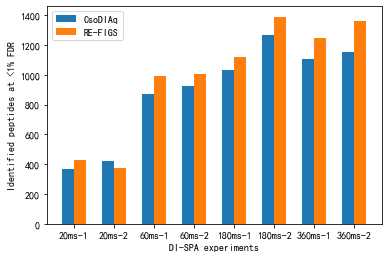

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']

labels = ['20ms-1', '20ms-2','60ms-1', '60ms-2','180ms-1', '180ms-2','360ms-1', '360ms-2',]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, num1[:8], width, label='CsoDIAq')
rects2 = ax.bar(x + width/2, num2[:8], width, label='RE-FIGS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('DI-SPA experiments')
ax.set_ylabel('Identified peptides at <1% FDR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
print("CsoDIAq: ",num1[:8],"sum: ",sum(num1[:8]))
print("RE-FIGS: ",num2[:8],"sum: ",sum(num2[:8]))

CsoDIAq:  [456, 458, 861, 811, 907, 948, 1470, 1528] sum:  7439
RE-FIGS:  [448, 621, 801, 934, 1044, 1035, 1622, 1413] sum:  7918


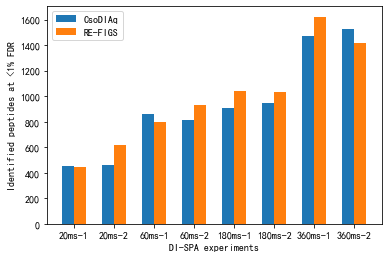

In [6]:
labels = ['20ms-1', '20ms-2','60ms-1', '60ms-2','180ms-1', '180ms-2','360ms-1', '360ms-2',]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, num1[8:], width, label='CsoDIAq')
rects2 = ax.bar(x + width/2, num2[8:], width, label='RE-FIGS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('DI-SPA experiments')
ax.set_ylabel('Identified peptides at <1% FDR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
print("CsoDIAq: ",num1[8:],"sum: ",sum(num1[8:]))
print("RE-FIGS: ",num2[8:],"sum: ",sum(num2[8:]))

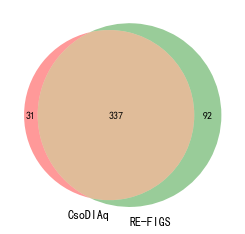

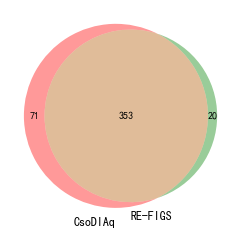

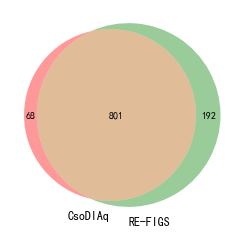

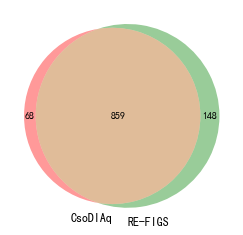

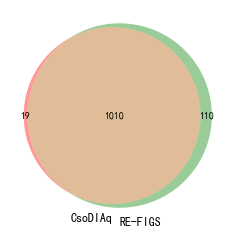

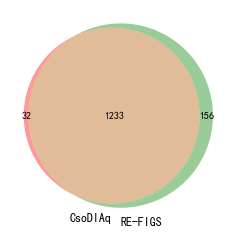

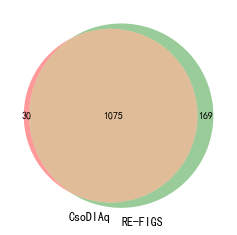

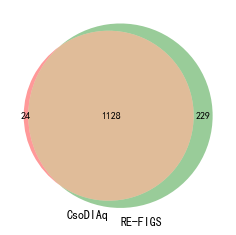

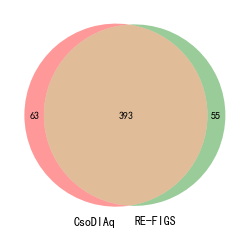

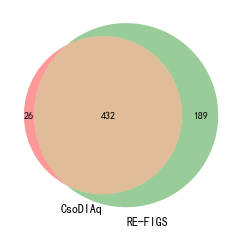

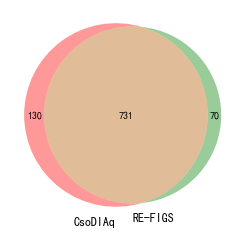

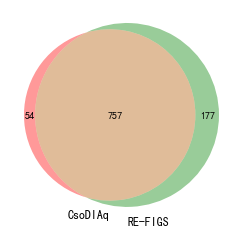

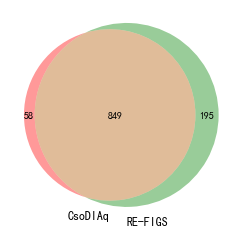

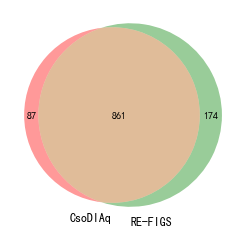

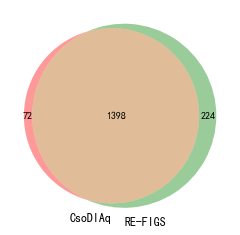

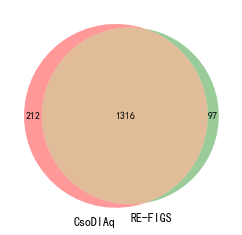

In [7]:
for i in range(0,16):
    venn2([set(samplelist1[i]),set(samplelist2[i])],['CsoDIAq','RE-FIGS'])
    plt.show()

[368, 424, 869, 927, 1029, 1265, 1105, 1152, 456, 458, 861, 811, 907, 948, 1470, 1528]
[429, 373, 993, 1007, 1120, 1389, 1244, 1357, 448, 621, 801, 934, 1044, 1035, 1622, 1413]
[396, 898, 1147, 1128, 457, 836, 927, 1499] [396, 898, 1147, 1128] [457, 836, 927, 1499]
[401, 1000, 1254, 1300, 534, 867, 1039, 1517] [401, 1000, 1254, 1300] [534, 867, 1039, 1517]
RE-FIGS:  [401, 1000, 1254, 1300] sum:  3955
CsoDIAq:  [396, 898, 1147, 1128] sum:  3569
RE-FIGS:  [534, 867, 1039, 1517] sum:  3957
CsoDIAq:  [457, 836, 927, 1499] sum:  3719


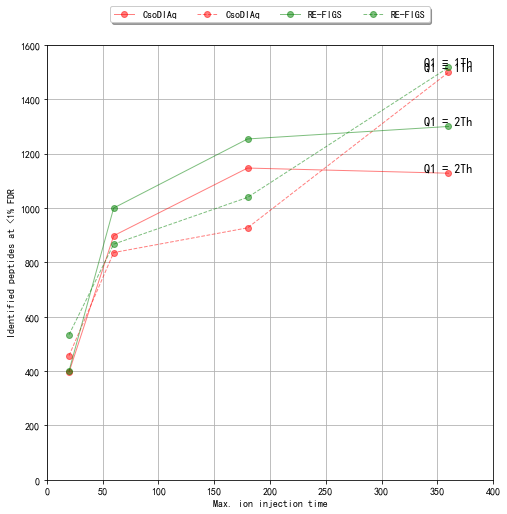

In [8]:
print(num1)
print(num2)
avg_num1=[int((num1[2*i]+num1[2*i+1])/2) for i in range(8)]
avg_num2=[int((num2[2*i]+num2[2*i+1])/2) for i in range(8)]
avg_num1_2=avg_num1[:4]
avg_num1_6=avg_num1[4:]
avg_num2_2=avg_num2[:4]
avg_num2_6=avg_num2[4:]
print(avg_num1,avg_num1_2,avg_num1_6)
print(avg_num2,avg_num2_2,avg_num2_6)
print("RE-FIGS: ",avg_num2_2,"sum: ",sum(avg_num2_2))
print("CsoDIAq: ",avg_num1_2,"sum: ",sum(avg_num1_2))
print("RE-FIGS: ",avg_num2_6,"sum: ",sum(avg_num2_6))
print("CsoDIAq: ",avg_num1_6,"sum: ",sum(avg_num1_6))


plt.figure(figsize=(8,8))
x_axis_data = [20,60,180,360]
        
#画图 
plt.plot(x_axis_data, avg_num1_2, 'ro-', alpha=0.5, linewidth=1, label='CsoDIAq')#'
plt.plot(x_axis_data, avg_num1_6, 'ro--', alpha=0.5, linewidth=1, label='CsoDIAq')
plt.plot(x_axis_data, avg_num2_2, 'go-', alpha=0.5, linewidth=1, label='RE-FIGS')
plt.plot(x_axis_data, avg_num2_6, 'go--', alpha=0.5, linewidth=1, label='RE-FIGS')

## 设置数据标签位置及大小
for a, b in zip(x_axis_data, avg_num1_2):
    if a==360:
        plt.text(a, b, "Q1 = 2Th", ha='center', va='bottom', fontsize=12)  #  ha='center', va='top'
for a, b1 in zip(x_axis_data, avg_num1_6):
    if a==360:
        plt.text(a, b1, "Q1 = 1Th", ha='center', va='bottom', fontsize=12)  
for a, b2 in zip(x_axis_data, avg_num2_2):
    if a==360:
        plt.text(a, b2, "Q1 = 2Th", ha='center', va='bottom', fontsize=12)
for a, b3 in zip(x_axis_data, avg_num2_6):
    if a==360:
        plt.text(a, b3, "Q1 = 1Th", ha='center', va='bottom', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True, ncol=4)
plt.grid()

plt.xlabel('Max. ion injection time')
plt.ylabel('Identified peptides at <1% FDR')#accuracy

plt.ylim(0,1600)#仅设置y轴坐标范围
plt.xlim(0,400)
plt.show()

In [9]:
print("RE-FIGS: ",avg_num2_2,"sum: ",sum(avg_num2_2))
print("CsoDIAq: ",avg_num1_2,"sum: ",sum(avg_num1_2))
print("RE-FIGS: ",avg_num2_6,"sum: ",sum(avg_num2_6))
print("CsoDIAq: ",avg_num1_6,"sum: ",sum(avg_num1_6))

RE-FIGS:  [401, 1000, 1254, 1300] sum:  3955
CsoDIAq:  [396, 898, 1147, 1128] sum:  3569
RE-FIGS:  [534, 867, 1039, 1517] sum:  3957
CsoDIAq:  [457, 836, 927, 1499] sum:  3719


In [10]:
avg_csodiaq=(sum(avg_num1_2)+sum(avg_num1_6))/8.0
avg_REFIGS=(sum(avg_num2_2)+sum(avg_num2_6))/8.0

In [11]:
avg_csodiaq

911.0

In [12]:
avg_REFIGS

989.0

In [13]:
avg_REFIGS/avg_csodiaq

1.0856201975850714

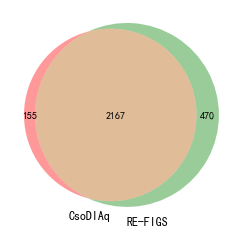

In [14]:
venn2([set(sample1),set(sample2)],['CsoDIAq','RE-FIGS'])

In [15]:
dirname = "../result/"
filelists_30ms = [
    'CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_30ms_45min_450nL-1_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv',
    'CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_30ms_45min_450nL-2_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv',
    'CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_30ms_45min_450nL-3_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv',
]
filelists_60ms = [
    'CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-1_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv',
    'CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-2_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv',
    'CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-3_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv',
]
filelists_120ms = [
    "CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
]

In [16]:
counts_30 = []
total_30 = pd.DataFrame([])
for filename in filelists_30ms:
    df_30 = pd.read_csv(os.path.join(dirname,filename))
    df_30['protein'] = df_30['peptide'].apply(peptide_type)
    sample = df_30[df_30['protein']=='SAMPLE']
    trap = df_30[df_30['protein']=='TRAP']
    decoy = df_30[df_30['protein']=='DECOY_null']
    counts_30.append(len(sample))
    total_30=pd.concat([total_30,sample])
    
peptides = set(total_30['peptide'].values)
peptide_counts = []
good_30 = []
for pep in tqdm(peptides):
    tmp = total_30[total_30['peptide']==pep]
    peptide_counts.append(len(tmp))
    if len(tmp)>=3:
        good_30.append(pep)

100%|██████████| 6204/6204 [00:03<00:00, 1556.61it/s]


In [17]:
counts_60 = []
total_60 = pd.DataFrame([])
for filename in filelists_60ms:
    df_60 = pd.read_csv(os.path.join(dirname,filename))
    df_60['protein'] = df_60['peptide'].apply(peptide_type)
    sample = df_60[df_60['protein']=='SAMPLE']
    trap = df_60[df_60['protein']=='TRAP']
    decoy = df_60[df_60['protein']=='DECOY_null']
    counts_60.append(len(sample))
    total_60=pd.concat([total_60,sample])

peptides = set(total_60['peptide'].values)
peptide_counts = []
good_60 = []
for pep in tqdm(peptides):
    tmp = total_60[total_60['peptide']==pep]
    peptide_counts.append(len(tmp))
    if len(tmp)>=3:
        good_60.append(pep)

100%|██████████| 9407/9407 [00:08<00:00, 1115.95it/s]


In [18]:
counts_120 = []
total_120 = pd.DataFrame([])
for filename in filelists_120ms:
    df_120 = pd.read_csv(os.path.join(dirname,filename))
    df_120['protein'] = df_120['peptide'].apply(peptide_type)
    sample = df_120[df_120['protein']=='SAMPLE']
    trap = df_120[df_120['protein']=='TRAP']
    decoy = df_120[df_120['protein']=='DECOY_null']
    counts_120.append(len(sample))
    total_120=pd.concat([total_120,sample])
    
peptides = set(total_120['peptide'].values)
peptide_counts = []
good_120 = []
for pep in tqdm(peptides):
    tmp = total_120[total_120['peptide']==pep]
    peptide_counts.append(len(tmp))
    if len(tmp)>=3:
        good_120.append(pep)

100%|██████████| 10316/10316 [00:11<00:00, 911.37it/s] 


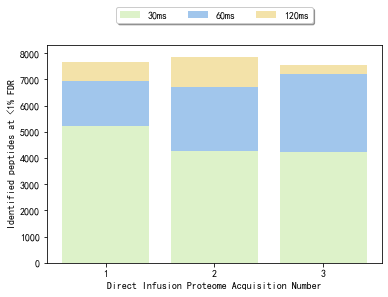

In [19]:
plt.bar([1,2,3],counts_30,label='30ms',color='#DDF2C9')
#plt.scatter([1,2,3],counts_30)
plt.bar([1,2,3],np.array(counts_60)-np.array(counts_30),bottom=counts_30,label='60ms',color = '#A1C6EC')
#plt.scatter([1,2,3],counts_60)
plt.bar([1,2,3],np.array(counts_120)-np.array(counts_60),bottom=counts_60,label='120ms',color='#F3E2A9')
#plt.scatter([1,2,3],counts_120)
new_ticks = np.linspace(1,3,3)
plt.xticks(new_ticks)
plt.ylim(0,8300)
plt.xlabel('Direct Infusion Proteome Acquisition Number')
plt.ylabel('Identified peptides at <1% FDR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=3)
plt.show()

In [20]:
total_120

,peptide,scan,zLIB,cosine,name,Peaks(Library),shared,MaCC_Score,cycle,cos_sim,...,norm_mae,match_it_ratio,match_number,protein,label,count_within_cycle,cycle_count,LDA_Score,FDR,p-value
0,ALTVPELTQQVFDAK,3466,2,0.997804,human.faims.6123.6123 PROTEIN: SAMPLE,10,10,1.581413,3,0.997704,...,0.018980,1.000000,10.0,SAMPLE,1,10,13,141.706378,0.000000,0.000015
1,LVQSPNSYFMDVK,4933,2,0.997273,human.faims.73310.73310 PROTEIN: SAMPLE,10,10,1.580571,4,0.992662,...,0.034167,1.000000,10.0,SAMPLE,1,10,13,141.684269,0.000000,0.000015
2,HFSVEGQLEFR,17388,2,0.995796,human.faims.43780.43780 PROTEIN: SAMPLE,10,10,1.578231,12,0.990082,...,0.030245,1.000000,10.0,SAMPLE,1,10,13,141.652125,0.000000,0.000015
3,ADLINNLGTIAK,2362,2,0.985944,human.faims.1551.1551 PROTEIN: SAMPLE,10,10,1.562616,2,0.968960,...,0.049232,1.000000,10.0,SAMPLE,1,10,13,141.524489,0.000000,0.000015
4,IHFPLATYAPVISAEK,6240,2,0.988864,human.faims.49639.49639 PROTEIN: SAMPLE,10,9,1.534564,5,0.982220,...,0.054166,0.968147,9.0,SAMPLE,1,12,13,140.878032,0.000000,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7635,EALEALVPVTIEVEVPFDLHR,8447,3,0.959017,human.faims.21345.21345 PROTEIN: SAMPLE,10,5,1.323185,6,0.858302,...,0.192237,0.587295,5.0,SAMPLE,1,8,13,71.709812,0.009919,0.001063
7636,SQISLRPAQSFLMNK,13231,2,0.981607,human.faims.103344.103344 PROTEIN: SAMPLE,10,5,1.354353,9,0.945990,...,0.125319,0.525944,5.0,SAMPLE,1,8,13,71.708110,0.009918,0.001063
7637,GLSIEQLTTLAEK,15652,2,0.971901,human.faims.39104.39104 PROTEIN: SAMPLE,10,6,1.390760,11,0.905463,...,0.157208,0.446061,6.0,SAMPLE,1,6,13,71.707172,0.009917,0.001063
7638,QAHLC+57.0215VLASNC+57.0215DEPMYVK,11657,3,0.985612,human.faims.85715.85715 PROTEIN: SAMPLE,10,7,1.454539,8,0.980073,...,0.055731,0.766186,7.0,SAMPLE,1,3,13,71.705206,0.009915,0.001063


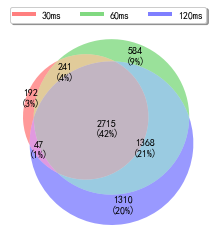

In [21]:
total = len(set(good_30)|set(good_60)|set(good_120))
v = venn3(
    [set(good_30),set(good_60),set(good_120)],
    ['','',''],
    set_colors=['#FF0000','#04B404','#0000FF'],
     subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")"
    )
# v.get_patch_by_id('111').set_color('#F3E2A9')
# v.get_patch_by_id('110').set_color('#0A2A22')
# v.get_patch_by_id('101').set_color('#0000FF')
# v.get_patch_by_id('011').set_color('#FFFF00')
custom_lines = [
    Line2D([0], [0], color='#FF0000', lw=4,alpha=0.5),
    Line2D([0], [0], color='#04B404', lw=4,alpha=0.5),
    Line2D([0], [0], color='#0000FF', lw=4,alpha=0.5),
]
plt.legend(custom_lines, ['30ms', '60ms','120ms'],loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=3)

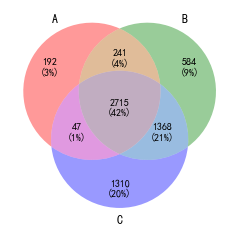

In [22]:
total = len(set(good_30)|set(good_60)|set(good_120))
venn3_unweighted(
    [set(good_30),set(good_60),set(good_120)],
     subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")"
    )

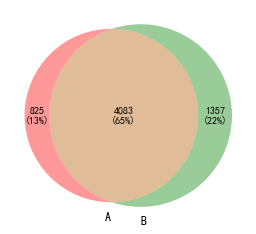

In [23]:
total = len(set(good_60)|set(good_120))
venn2(
    [set(good_60),set(good_120)],
     subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")"
    )

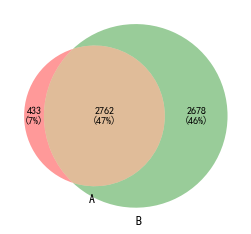

In [24]:
total = len(set(good_30)|set(good_120))
venn2(
    [set(good_30),set(good_120)],
     subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")"
    )

In [25]:
np.mean(counts_60)/np.mean(counts_120)

0.9053626392682186

In [26]:
np.mean(counts_30)/np.mean(counts_120)

0.5941821649976157

In [27]:
np.mean(counts_60)

6961.333333333333

In [28]:
np.mean(counts_120)

7689.0

In [29]:
np.mean(counts_30)

4568.666666666667

In [30]:
len(good_120)

5440

In [31]:
1055/5424

0.19450589970501475

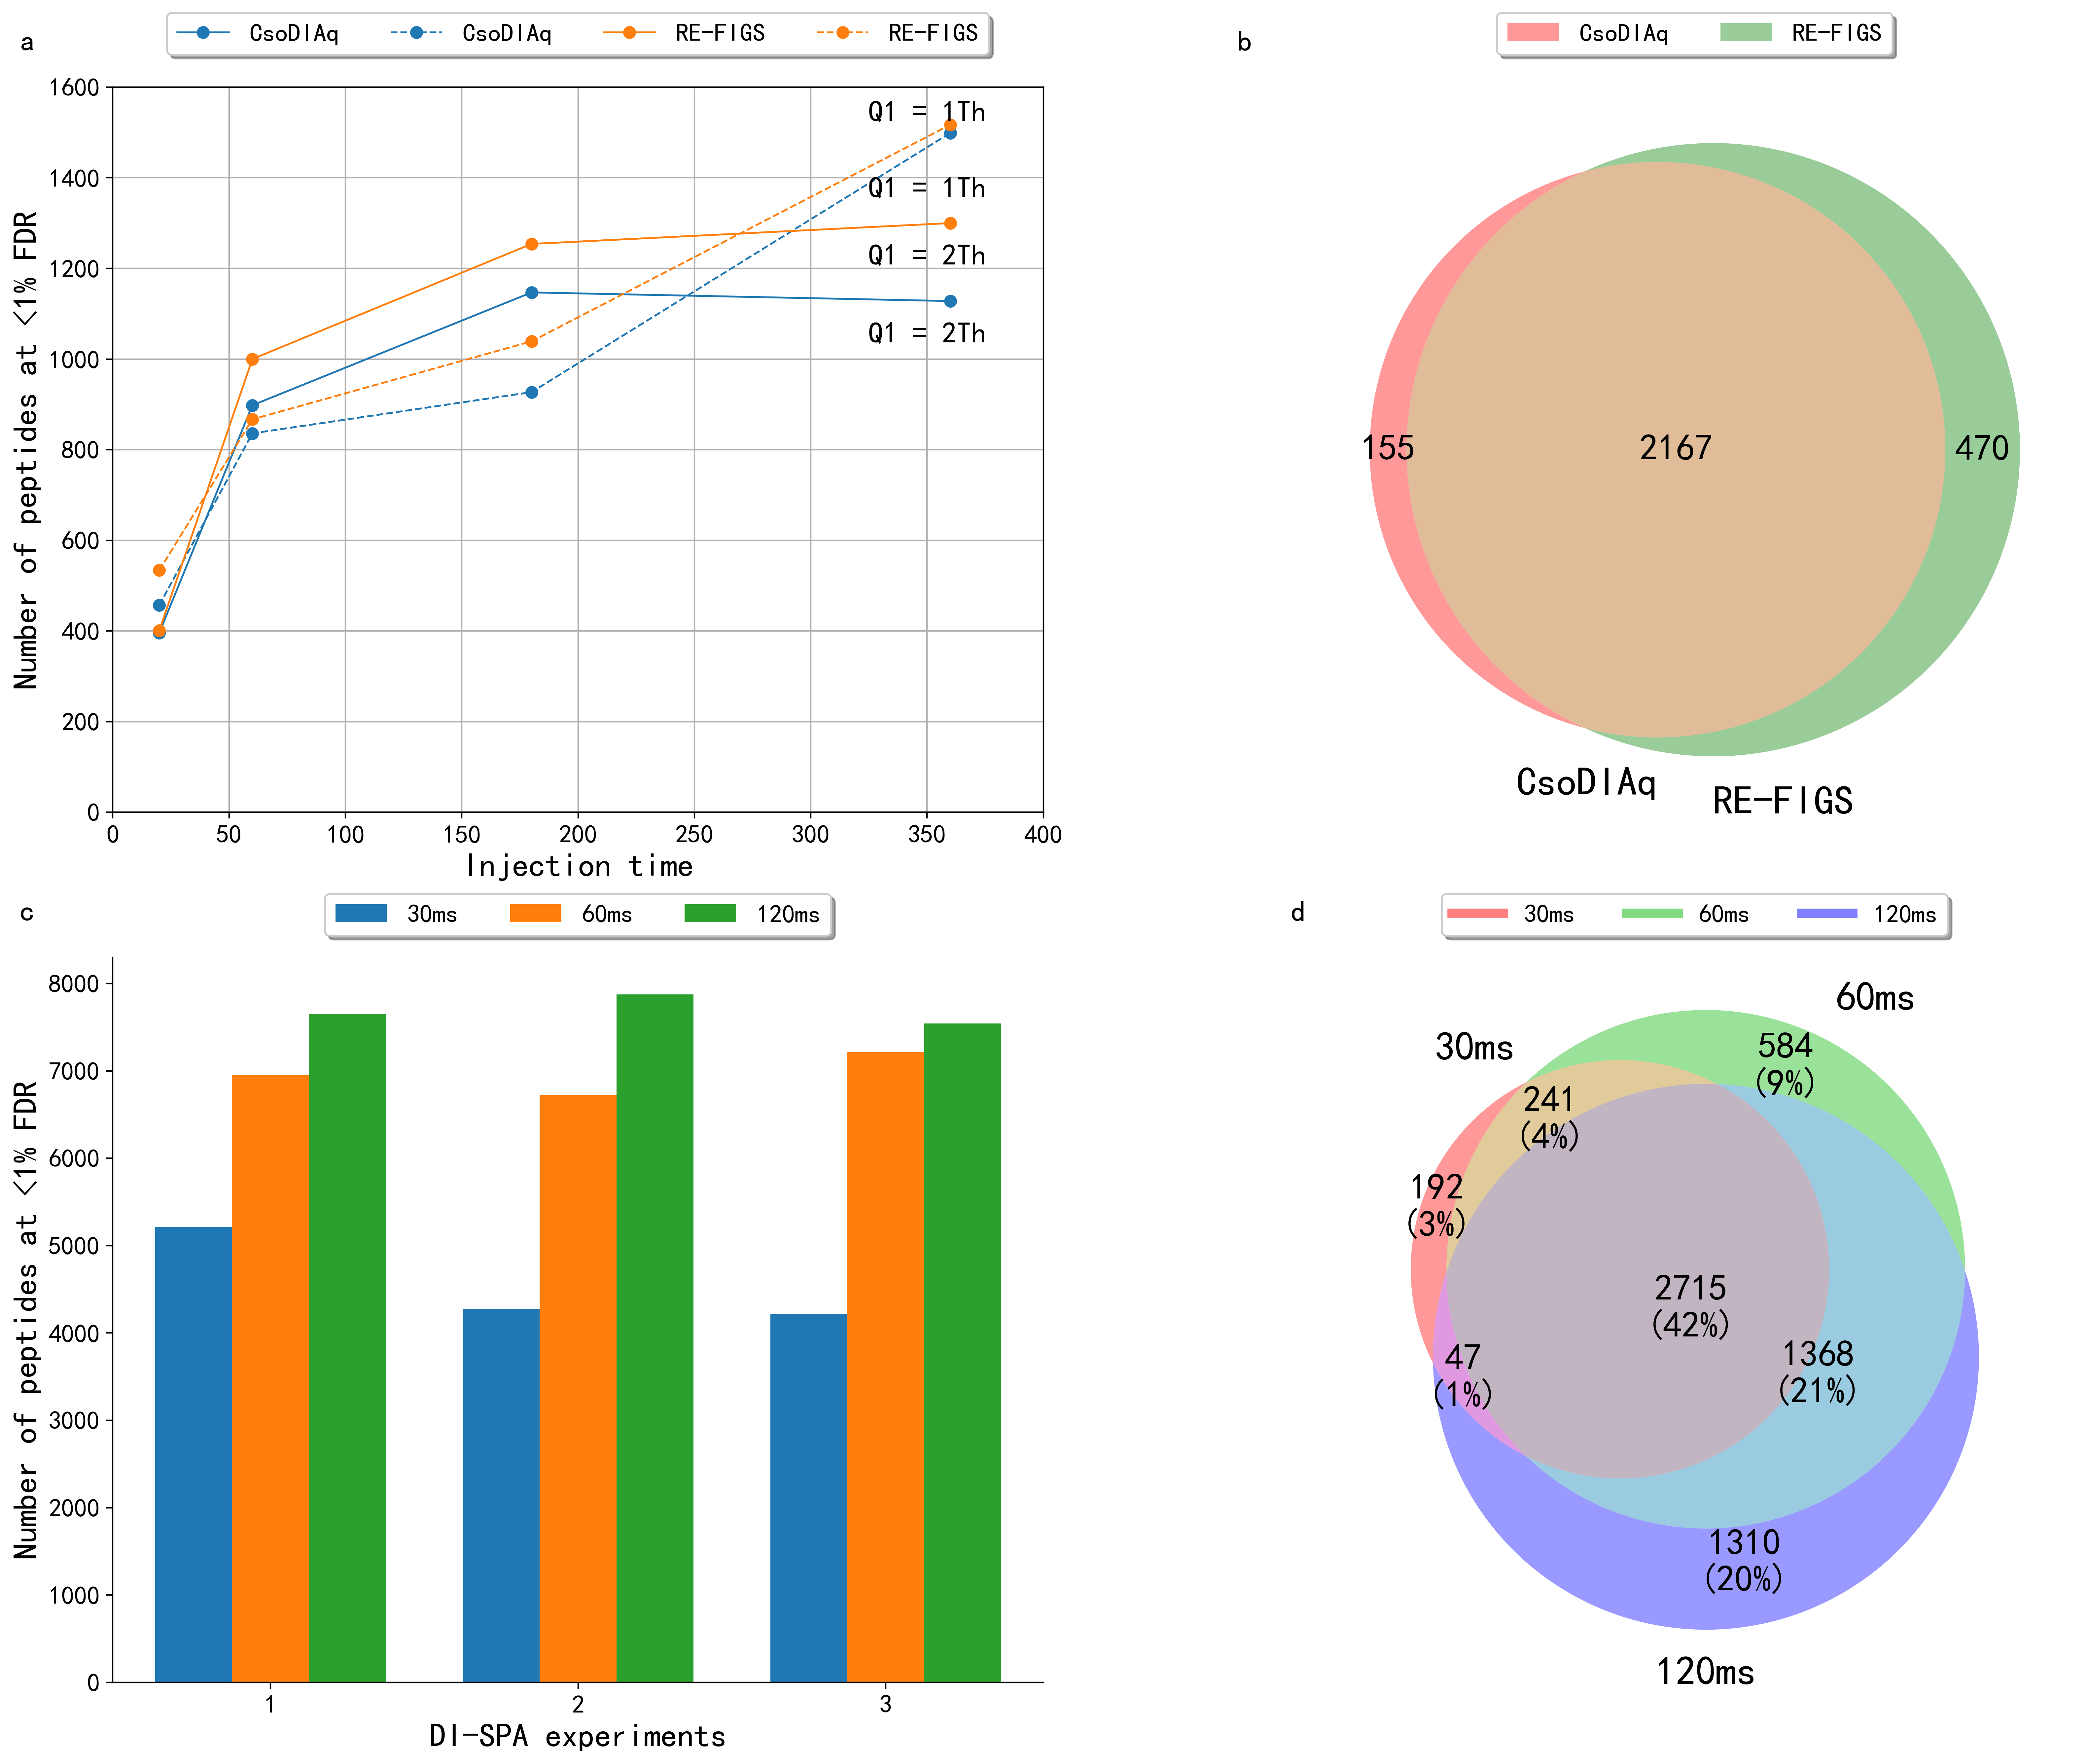

In [32]:
fig, axs = plt.subplots(2,2,figsize=(20,20*0.8),dpi=400)

###################
x_axis_data = [20,60,180,360]
axs[0][0].plot(x_axis_data, avg_num1_2, 'o-', alpha=1, linewidth=1, label='CsoDIAq',color='#1f77b4')
axs[0][0].plot(x_axis_data, avg_num1_6, 'o--', alpha=1, linewidth=1,label='CsoDIAq',color='#1f77b4')
axs[0][0].plot(x_axis_data, avg_num2_2, 'o-', alpha=1, linewidth=1, label='RE-FIGS',color='#ff7f0e')
axs[0][0].plot(x_axis_data, avg_num2_6, 'o--', alpha=1, linewidth=1,label='RE-FIGS',color='#ff7f0e')

for a, b in zip(x_axis_data, avg_num1_2):
    if a==360:
        axs[0][0].text(a-10, b-100, "Q1 = 2Th", ha='center', va='bottom', fontsize=16)  #  ha='center', va='top'
for a, b1 in zip(x_axis_data, avg_num1_6):
    if a==360:
        axs[0][0].text(a-10, b1-150, "Q1 = 1Th", ha='center', va='bottom', fontsize=16)  
for a, b2 in zip(x_axis_data, avg_num2_2):
    if a==360:
        axs[0][0].text(a-10, b2-100, "Q1 = 2Th", ha='center', va='bottom', fontsize=16)
for a, b3 in zip(x_axis_data, avg_num2_6):
    if a==360:
        axs[0][0].text(a-10, b3, "Q1 = 1Th", ha='center', va='bottom', fontsize=16)

axs[0][0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=4,fontsize=14)
axs[0][0].grid()
axs[0][0].tick_params(labelsize=14)
axs[0][0].set_xlim(0,400)
axs[0][0].set_ylim(0,1600)
axs[0][0].set_xlabel('Injection time',fontsize=18)
axs[0][0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)


################
v1=venn2([set(sample1),set(sample2)],['CsoDIAq','RE-FIGS'],ax = axs[0][1])
axs[0][1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=2,fontsize=14)
for t in v1.set_labels:
    t.set_fontsize(22)
for t in v1.subset_labels:
    t.set_fontsize(20)

##########
xarange=np.arange(1,len(counts_30)+1,1)
mywidth = 0.25
axs[1][0].bar(xarange-0.25,counts_30,label='30ms',width=mywidth)
axs[1][0].bar(xarange,np.array(counts_60),label='60ms',width=mywidth)
axs[1][0].bar(xarange+0.25,np.array(counts_120),label='120ms',width=mywidth)
# axs[1][0].bar([1,2,3],counts_30,label='30ms',color='#DDF2C9')
# axs[1][0].bar([1,2,3],np.array(counts_60)-np.array(counts_30),bottom=counts_30,label='60ms',color = '#A1C6EC')
# axs[1][0].bar([1,2,3],np.array(counts_120)-np.array(counts_60),bottom=counts_60,label='120ms',color='#F3E2A9')

new_ticks = np.linspace(1,3,3)
axs[1][0].set_xticks(new_ticks)
axs[1][0].set_ylim(0,8300)
axs[1][0].spines['right'].set_visible(False)
axs[1][0].spines['top'].set_visible(False)
axs[1][0].set_xlabel('DI-SPA experiments',fontsize=18)
axs[1][0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)
axs[1][0].tick_params(labelsize=14)
axs[1][0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.105),fancybox=True, shadow=True, ncol=3,fontsize=14)

###########
total = len(set(good_30)|set(good_60)|set(good_120))
v = venn3(
    [set(good_30),set(good_60),set(good_120)],
    ['30ms','60ms','120ms'],
    set_colors=['#FF0000','#04B404','#0000FF'],
    ax = axs[1][1],
     subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")"
    )
for t in v.subset_labels:
    t.set_fontsize(20)
for t in v.set_labels:
    t.set_fontsize(22)
custom_lines = [
    Line2D([0], [0], color='#FF0000', lw=5,alpha=0.5),
    Line2D([0], [0], color='#04B404', lw=5,alpha=0.5),
    Line2D([0], [0], color='#0000FF', lw=5,alpha=0.5),
]
axs[1][1].legend(custom_lines,['30ms', '60ms','120ms'],loc='upper center', bbox_to_anchor=(0.5, 1.105),fancybox=True, shadow=True,ncol=3,fontsize=14)

axs = axs.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
plt.savefig('fig4.jpg')

In [33]:
counts_30

[5214, 4275, 4217]

In [34]:
np.mean(counts_60)/np.mean(counts_30)

1.5237122428133663

In [35]:
counts_120

[7652, 7874, 7541]

In [36]:
np.mean(counts_60)

6961.333333333333

In [37]:
np.mean(counts_120)

7689.0

In [38]:
np.mean(counts_30)

4568.666666666667

In [39]:
np.mean(counts_120)/np.mean(counts_60)

1.1045297835663666